## Gold Price Prediction Model using RandomForestRegression

In [2]:
%pip install numpy pandas matplotlib seaborn sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
# load dataset

gold_data = pd.read_csv('dataset/gold_price_data.csv')

In [4]:
# print first 5 rows of the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows of the dataset

gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and cols

gold_data.shape

(2290, 6)

In [7]:
# getting some info about the data

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: >

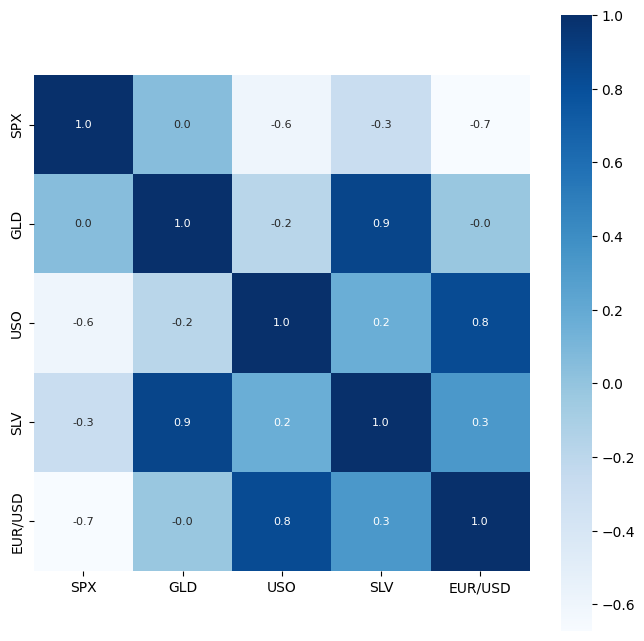

In [11]:
correlation = gold_data.corr(numeric_only=True)

plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [12]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\Praveen\AppData\Local\Temp\ipykernel_992\1408463314.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

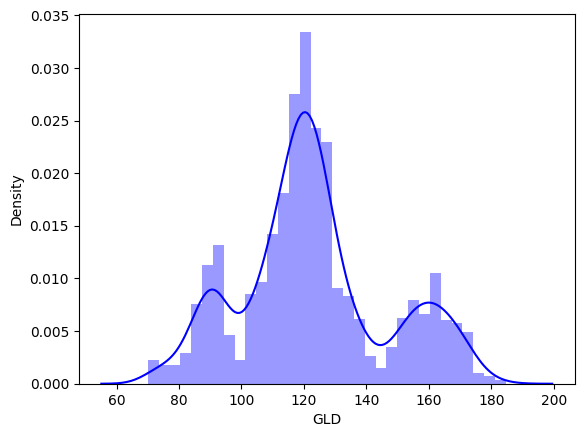

In [17]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'], color='blue')

In [18]:
# Splitting the features and target
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [19]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [20]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

Splitting into Training data and Test data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=6)

In [22]:
X_train

,SPX,USO,SLV,EUR/USD
2083,2433.139893,9.460000,16.650000,1.125518
929,1409.750000,41.290001,31.980000,1.317714
313,910.710022,38.700001,14.120000,1.391498
1142,1556.219971,33.040001,28.020000,1.298802
1520,2066.550049,25.580000,15.750000,1.247007
...,...,...,...,...
848,1215.650024,37.820000,31.400000,1.345804
335,982.179993,36.320000,13.840000,1.414607
618,1213.400024,37.049999,26.180000,1.386963
2004,2278.870117,11.320000,16.629999,1.070859


Modal Train - Random Forest Regression

In [23]:
regression = RandomForestRegressor(n_estimators=100)

In [24]:
regression.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
# Model Evaluation

x_test_prediction = regression.predict(X_test)
x_test_prediction

array([122.4553908 , 112.46729931, 123.99620064, 109.15669988,
        72.38919924, 113.17579858, 123.02539969, 126.15150004,
       177.0766995 , 167.49779864, 165.85670026, 117.28690142,
       146.99009757, 161.52849905,  88.08929914, 103.46249856,
       110.93389998, 121.19610086,  86.4109993 ,  92.72229968,
       126.50020013, 115.07310041, 112.13559957, 149.84510049,
        93.82920033, 119.95330115, 115.75540056, 118.97269812,
       131.25340453, 147.56709853, 121.30329881, 125.65910172,
       148.04179829, 118.98520082, 120.78850016, 102.66709882,
       131.0013045 , 124.26479985, 156.77079994, 126.14020009,
       114.23230001, 175.25479984,  93.47299935,  99.16229956,
       119.99230059, 118.97779871, 135.21819891, 126.61099887,
       123.17269882, 117.6723017 , 107.87110063, 117.85340148,
        94.01099909, 116.57510156, 102.68529958,  82.77769934,
       140.92450048, 140.8303018 , 160.30369921, 173.7588996 ,
       126.33300064, 102.67889829,  92.30539962,  90.90

# R Squared Error

In [27]:
error_score = metrics.r2_score(Y_test, x_test_prediction)
print("R squared error : ", error_score)

R squared error :  0.9875575617717837


## Compare the actual values and predicted values

In [28]:
Y_test = list(Y_test)

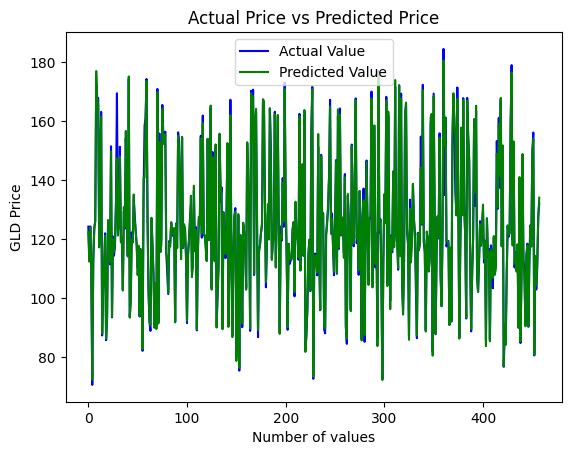

In [31]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(x_test_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()